Lab Exercise 2 : CSE1014 : Foundations of Artificial Intelligence(AI) : Agent Programming

Model-Based Agent

# Problem Statement

In a E-commerce website, we have the following privileges:
1. Surfing for items.
2. Adding items to the cart.
3. Adding items to the wishlist.
4. Checkout the cart

The website gives timely notifications based on the user's activity history. Here, we develop a Model-Based Agent which gives the required notification messages based on the assumed criterion:
<table>
<tr>
<td>Condition</td>
<td>Action</td>
</tr>
<tr>
<td>Counter is divisible by 2</td>
<td>Send the notification for any 2 customers in the add to cart history</td>
</tr>
<tr>
<td>Counter is divisible by 3</td>
<td>Send the notification for any 2 customers in the add to wishlist history</td>
</tr>
<tr>
<td>Counter is divisible by 7</td>
<td>Send the notification for any 2 customers in the surf history</td>
</tr>
<tr>
<td>If items are checked out</td>
<td>Send the notification appreciating the use of the interface</td>
</tr>
</table>
<u>Note:</u> The customers are chosen randomly.

# Importing the required modules

In [39]:
import pandas as pd
import random as r
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

# Agent Programming

## Agent Code

In [40]:
class Agent:
    def __init__(self) :
        self.notificationMessages = {
                       "Surfed": "Were your looking for something?",
                       "AddedToCart": "Your cart has something..",
                       "AddedToWishList": "You have pending wishes...",
                       "Checkout": "Thank you for shopping with us!"
                    }
        self.hist = {
                       "Surfed": [],
                       "AddedToCart": [],
                       "AddedToWishList": []
                    }
        self.c = 0
        self.op = None
    def __sendNotifications(self,type):
        if len(self.hist[type]) > 1:
         for i in set(r.sample(self.hist[type],k=2)):
            print(str(i)+":"+self.notificationMessages[type])
            self.op.at[type,i] += 1
    def move(self,env) :
        self.c = 0
        self.op = pd.DataFrame(0,columns=env.columns,index=list(self.hist.keys()))
        for i in env.index:
            for j in env.columns:
               self.c += 1
               if env.at[i,j] == "Checkout":
                   print(str(j)+":"+self.notificationMessages["Checkout"])
               else:
                   self.hist[env.at[i,j]].append(j)
               if self.c % 7 == 0:
                   self.__sendNotifications("Surfed")
               elif self.c % 2 == 0:
                   self.__sendNotifications("AddedToCart")
               elif self.c % 3 == 0:
                   self.__sendNotifications("AddedToWishList")
    def getOp(self):
        return self.op


## Environment Code

The environment is of a matrix structure with rows as the product names and columns as custumer ids. A 9 X 9 matrix is randomly generated with each cell comprising of an action performed by the user on that product.

In [41]:
class Environment:
    def __init__(self) :
        self.pdts = ["Laptop","Earphones","Headphones","Pendrive","Notebooks",
                     "Pencils","Smartphone","Speakers","Sanitiser"]
        self.custids = r.choices(range(1000,9999),k=9) 
        self.env = pd.DataFrame(columns=self.custids,index=self.pdts)
        self.activities = ["Surfed","AddedToCart","AddedToWishList","Checkout"]
    def createEnv(self):
        for i in self.env.index:
            for j in self.env.columns:
                self.env.at[i,j] = r.choice(self.activities)
    def showEnv(self):
        print(tabulate(self.env,headers='keys', tablefmt='fancy_grid'))

## Driver's Code

In [42]:
e = Environment()
e.createEnv()
e.showEnv()

╒════════════╤═════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╕
│            │ 2905        │ 7761            │ 7087            │ 9307            │ 3622            │ 3391            │ 2380            │ 4771            │ 8491            │
╞════════════╪═════════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╡
│ Laptop     │ Checkout    │ AddedToWishList │ AddedToWishList │ AddedToCart     │ AddedToCart     │ Checkout        │ AddedToWishList │ Checkout        │ Checkout        │
├────────────┼─────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ Earphones  │ Surfed      │ Checkout        │ AddedToCart     │ AddedToWishList │ Checkout        │ AddedToCart     │ AddedToCart     

# Final Result

In [43]:
a = Agent()
a.move(e.env)

2905:Thank you for shopping with us!
7761:You have pending wishes...
7087:You have pending wishes...
3391:Thank you for shopping with us!
9307:Your cart has something..
3622:Your cart has something..
4771:Thank you for shopping with us!
9307:Your cart has something..
3622:Your cart has something..
8491:Thank you for shopping with us!
7761:You have pending wishes...
7087:You have pending wishes...
9307:Your cart has something..
3622:Your cart has something..
7761:Thank you for shopping with us!
3622:Your cart has something..
7087:Your cart has something..
3622:Thank you for shopping with us!
7761:You have pending wishes...
7087:You have pending wishes...
9307:Your cart has something..
3622:Your cart has something..
9307:Your cart has something..
2380:Your cart has something..
2905:Thank you for shopping with us!
7761:Thank you for shopping with us!
3622:Your cart has something..
3391:Your cart has something..
2905:Were your looking for something?
8491:Were your looking for something?
93

# Visualising the final results

Text(0.5, 1.0, "Notification Agent's Activity")

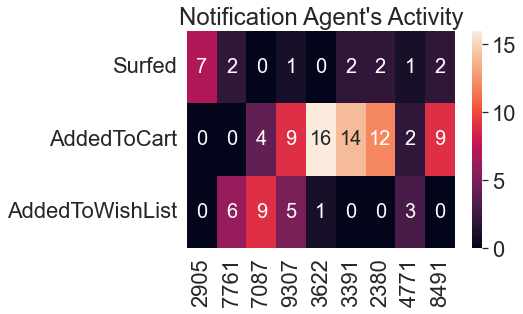

In [44]:
sns.set(font_scale=2)
sns.heatmap(a.getOp(), annot=True, fmt="d", annot_kws={"fontsize":20})
plt.title("Notification Agent's Activity")